In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties import unumpy
Data="Data_oscilador_org.xlsx"

In [3]:

Data_eq=pd.read_excel(Data,sheet_name=0)
Data_eq


,Theta(rads)(±0.01),Vpp(V)(±0.001)
0,3.1,0.396
1,3.2,0.776
2,3.3,1.110
3,3.4,1.500
4,3.5,2.020
5,3.6,2.360


Slope: 0.25003126464379616 ± 0.007940736633186262
Intercept: 3.0098741363049055 ± 0.012082404241635925
Residuals: 0   -0.008887
1   -0.003898
2    0.012591
3    0.015079
4   -0.014937
5    0.000052
dtype: float64


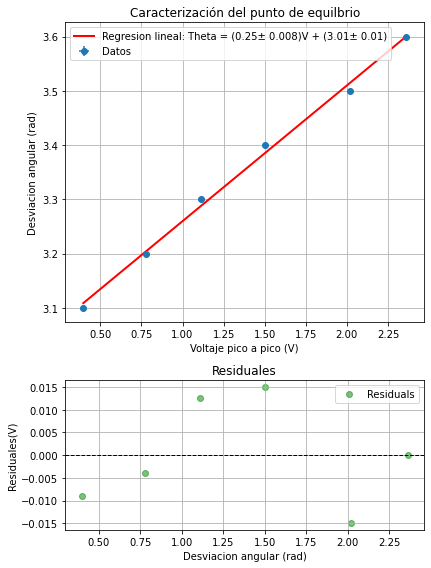

In [4]:
# Define the linear function for curve fitting
def linear_function(X, a, b):
    return a * X + b

y= Data_eq['Theta(rads)(±0.01)']
x= Data_eq['Vpp(V)(±0.001)']
yerr = [0.001]*len(y)
xerr = [0.01]*len(x)

# Perform the curve fitting
popt, pcov = curve_fit(linear_function, x,y)

# Get the slope and intercept
slope = popt[0]
intercept = popt[1]

# Get the standard errors for the parameters
slope_std_err = np.sqrt(pcov[0, 0])
intercept_std_err = np.sqrt(pcov[1, 1])

## Setting variables


# Predict the Y values
Y_pred = linear_function(x, *popt)

# Calculate residuals
residuals = y - Y_pred

print(f"Slope: {slope} ± {slope_std_err}")
print(f"Intercept: {intercept} ± {intercept_std_err}")
print(f"Residuals: {residuals}")


# Create a figure with two subplots
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6,8),gridspec_kw={'height_ratios': [2, 1]})  # 2 rows, 1 column, width = 10 inches, height = 10 inches

# Plot the regression line
ax1.errorbar(x, y, yerr, xerr,  fmt='o', label='Datos')
ax1.plot(x, Y_pred, color='red', linewidth=2, label=f'Regresion lineal: Theta = ({slope:.2f}± {slope_std_err:.3f})V + ({intercept:.2f}± {intercept_std_err:.2f})')

ax1.set_xlabel('Voltaje pico a pico (V)')
ax1.set_ylabel('Desviacion angular (rad)')
ax1.legend(loc='upper left')
ax1.set_title('Caracterización del punto de equilbrio')
#Plot residuals
ax2.scatter(x, residuals, color='green', alpha=0.5, label='Residuals')
ax2.axhline(0, color='black', linewidth=1, linestyle='--')
ax2.set_xlabel('Desviacion angular (rad)')
ax2.set_ylabel('Residuales(V)')#
ax2.legend(loc='upper right')
ax2.set_title('Residuales')


ax1.grid()
ax2.grid()
plt.tight_layout()

# Save the figure as a PDF file
plt.savefig('Equilibrio.jpeg', format='jpeg')
plt.savefig('Equilibrio.pdf', format='pdf')
plt.show()



In [5]:

Data_Tau=pd.read_excel(Data,sheet_name=1)
Data_Tau


,Theta (±0.01),Tau(Nm)(±0.002)
0,-1.08,-0.099263
1,-0.70,-0.049632
2,-0.42,-0.024816
3,-0.22,-0.012408
4,0.00,0.000000
5,0.20,0.012408
6,0.38,0.024816
7,0.67,0.049632
8,1.09,0.099263


Slope: 0.0833251356982054 ± 0.004258867641822709
Intercept: 0.000740667880149 ± 0.0027316575461046695
Residuals: 0   -0.010013
1    0.007955
2    0.009440
3    0.005183
4   -0.000741
5   -0.004998
6   -0.007588
7   -0.006937
8    0.007698
dtype: float64


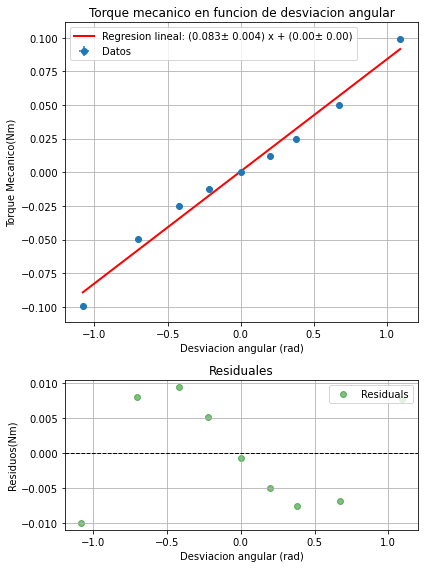

In [6]:

y= Data_Tau['Tau(Nm)(±0.002)']
x= Data_Tau['Theta (±0.01)']
yerr = [0.002]*len(y)
xerr = [0.01]*len(x)

# Perform the curve fitting
popt, pcov = curve_fit(linear_function, x,y)

# Get the slope and intercept
slope = popt[0]
intercept = popt[1]

# Get the standard errors for the parameters
slope_std_err = np.sqrt(pcov[0, 0])
intercept_std_err = np.sqrt(pcov[1, 1])

## Setting variables


# Predict the Y values
Y_pred = linear_function(x, *popt)

# Calculate residuals
residuals = y - Y_pred

print(f"Slope: {slope} ± {slope_std_err}")
print(f"Intercept: {intercept} ± {intercept_std_err}")
print(f"Residuals: {residuals}")


# Create a figure with two subplots
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6,8),gridspec_kw={'height_ratios': [2, 1]})  # 2 rows, 1 column, width = 10 inches, height = 10 inches

# Plot the regression line
ax1.errorbar(x, y, yerr, xerr,  fmt='o', label='Datos')
ax1.plot(x, Y_pred, color='red', linewidth=2, label=f'Regresion lineal: ({slope:.3f}± {slope_std_err:.3f}) x + ({intercept:.2f}± {intercept_std_err:.2f})')

ax1.set_xlabel('Desviacion angular (rad)')
ax1.set_ylabel("Torque Mecanico(Nm)")
ax1.legend(loc='upper left')
ax1.set_title('Torque mecanico en funcion de desviacion angular')
#Plot residuals
ax2.scatter(x, residuals, color='green', alpha=0.5, label='Residuals')
ax2.axhline(0, color='black', linewidth=1, linestyle='--')
ax2.set_xlabel('Desviacion angular (rad)')
ax2.set_ylabel('Residuos(Nm)')#
ax2.legend(loc='upper right')
ax2.set_title('Residuales')


ax1.grid()
ax2.grid()
plt.tight_layout()

# Save the figure as a PDF file
plt.savefig('TorqueMec.jpeg', format='jpeg')
plt.savefig('TorqueMec.pdf', format='pdf')
plt.show()



In [7]:
r=ufloat(1.265,0.001)
m=ufloat(50,10)
tau=2*1/100*m/1000*9.77
tau

0.00977+/-0.001954

In [8]:

Data_I=pd.read_excel(Data,sheet_name=2)
Data_I

,n,Periodo(s)(±0.01),Periodo^2(s^2),Sigma T^2
0,0,1.12,1.2544,0.0224
1,2,1.32,1.7424,0.0264
2,4,1.44,2.0736,0.0288
3,6,1.60,2.5600,0.0320
4,8,1.68,2.8224,0.0336


Slope: 0.1976800003036334 ± 0.010620332720068973
Intercept: 1.2998399994729302 ± 0.05202879216046281
Residuals: 0   -0.04544
1    0.04720
2   -0.01696
3    0.07408
4   -0.05888
dtype: float64


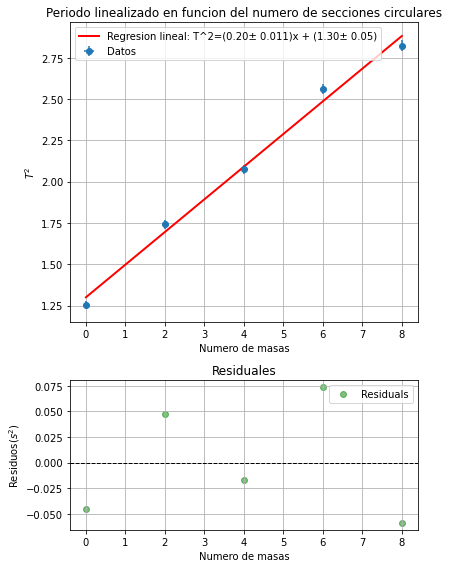

In [13]:

y= Data_I['Periodo^2(s^2)']
x= Data_I['n']
yerr =  Data_I['Sigma T^2']
xerr = [0]*len(x)

# Perform the curve fitting
popt, pcov = curve_fit(linear_function, x,y)

# Get the slope and intercept
slope = popt[0]
intercept = popt[1]

# Get the standard errors for the parameters
slope_std_err = np.sqrt(pcov[0, 0])
intercept_std_err = np.sqrt(pcov[1, 1])

## Setting variables


# Predict the Y values
Y_pred = linear_function(x, *popt)

# Calculate residuals
residuals = y - Y_pred

print(f"Slope: {slope} ± {slope_std_err}")
print(f"Intercept: {intercept} ± {intercept_std_err}")
print(f"Residuals: {residuals}")


# Create a figure with two subplots
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6,8),gridspec_kw={'height_ratios': [2, 1]})  # 2 rows, 1 column, width = 10 inches, height = 10 inches

# Plot the regression line
ax1.errorbar(x, y, yerr, xerr,  fmt='o', label='Datos')
ax1.plot(x, Y_pred, color='red', linewidth=2, label=f'Regresion lineal: T^2=({slope:.2f}± {slope_std_err:.3f})x + ({intercept:.2f}± {intercept_std_err:.2f})')

ax1.set_xlabel('Numero de masas')
ax1.set_ylabel("$T^2$")
ax1.legend(loc='upper left')
ax1.set_title('Periodo linealizado en funcion del numero de secciones circulares')
#Plot residuals
ax2.scatter(x, residuals, color='green', alpha=0.5, label='Residuals')
ax2.axhline(0, color='black', linewidth=1, linestyle='--')
ax2.set_xlabel('Numero de masas')
ax2.set_ylabel('Residuos($s^2$)')#
ax2.legend(loc='upper right')
ax2.set_title('Residuales')


ax1.grid()
ax2.grid()
plt.tight_layout()

# Save the figure as a PDF file
plt.savefig('Inercia.jpeg', format='jpeg')
plt.savefig('Inercia.pdf', format='pdf')
plt.show()

m_I=ufloat(popt[0],pcov[0,0])

b_I=ufloat(popt[1],pcov[1,1])

In [34]:

R1=ufloat(0.0225,0.001)
R2=ufloat(0.047,0.001)
M=ufloat(0.212,0.001)

K_t=((np.pi**2 * M)*(R1**2+ R2**2))/(2*m_I)
K_t



0.014369865392265093+/-0.0005557509573718291

In [41]:
I=b_I *K_t /(4*np.pi**2 )
I

0.00047313258629308116+/-1.8324794457763098e-05

In [19]:
Data_B=pd.read_excel(Data,sheet_name=3)
Data_B

,Corriente (A)(±0.01),Equilibrio (rad)(±0.01),Delta theta(±0.01)
0,0.1,3.08,0.07
1,0.2,3.14,0.13
2,0.3,3.20,0.19
3,0.4,3.28,0.27
4,0.5,3.33,0.32
5,0.6,3.38,0.37
6,0.7,3.44,0.43
7,0.8,3.49,0.48
8,0.9,3.54,0.53
9,1.0,3.58,0.57


Slope: 0.6064935065675436 ± 0.006496932757810284
Intercept: -0.00250000000218642 ± 0.004031240717542771
Residuals: 0     0.011851
1     0.011201
2     0.010552
3     0.029903
4     0.019253
5     0.008604
6     0.007955
7    -0.002695
8    -0.013344
9    -0.033994
10    0.028994
11    0.008344
12   -0.002305
13   -0.012955
14   -0.023604
15   -0.014253
16   -0.024903
17   -0.015552
18    0.003799
19    0.003149
dtype: float64


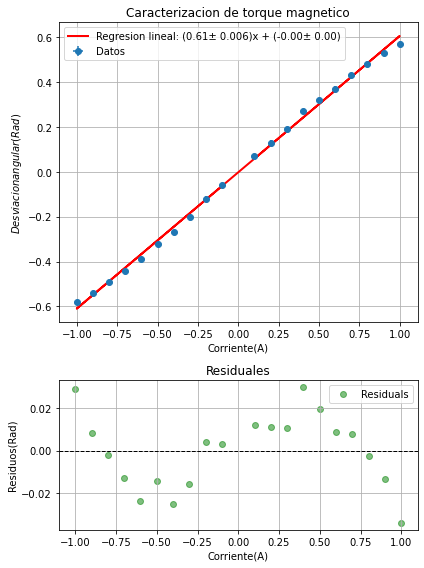

In [20]:

y= Data_B['Delta theta(±0.01)']
x= Data_B['Corriente (A)(±0.01)']
yerr =  [0.01]*len(y)
xerr = [0.01]*len(x)

# Perform the curve fitting
popt, pcov = curve_fit(linear_function, x,y)

# Get the slope and intercept
slope = popt[0]
intercept = popt[1]

# Get the standard errors for the parameters
slope_std_err = np.sqrt(pcov[0, 0])
intercept_std_err = np.sqrt(pcov[1, 1])

## Setting variables


# Predict the Y values
Y_pred = linear_function(x, *popt)

# Calculate residuals
residuals = y - Y_pred

print(f"Slope: {slope} ± {slope_std_err}")
print(f"Intercept: {intercept} ± {intercept_std_err}")
print(f"Residuals: {residuals}")


# Create a figure with two subplots
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6,8),gridspec_kw={'height_ratios': [2, 1]})  # 2 rows, 1 column, width = 10 inches, height = 10 inches

# Plot the regression line
ax1.errorbar(x, y, yerr, xerr,  fmt='o', label='Datos')
ax1.plot(x, Y_pred, color='red', linewidth=2, label=f'Regresion lineal: ({slope:.2f}± {slope_std_err:.3f})x + ({intercept:.2f}± {intercept_std_err:.2f})')

ax1.set_xlabel('Corriente(A)')
ax1.set_ylabel("$Desviacion angular(Rad)$")
ax1.legend(loc='upper left')
ax1.set_title('Caracterizacion de torque magnetico')
#Plot residuals
ax2.scatter(x, residuals, color='green', alpha=0.5, label='Residuals')
ax2.axhline(0, color='black', linewidth=1, linestyle='--')
ax2.set_xlabel('Corriente(A)')
ax2.set_ylabel('Residuos(Rad)')#
ax2.legend(loc='upper right')
ax2.set_title('Residuales')


ax1.grid()
ax2.grid()
plt.tight_layout()
m_B=ufloat(popt[0],pcov[0,0])
# Save the figure as a PDF file
plt.savefig('TorqueMag.jpeg', format='jpeg')
plt.savefig('TorqueMag.pdf', format='pdf')
plt.show()

In [39]:
N=201
a=0.05588
K_h= 8/(5 *np.sqrt(5)) * 1.25663706 * 10**(-6) *N/a
mu=0.0576*m_B/K_h
mu

10.801004198102948+/-0.0007517176081911918

In [22]:
Data_R1=pd.read_excel(Data,sheet_name=4)
Data_R1

,Frecuencia(mHz)(±0.1),Voltaje(V)(±0.001)
0,700,0.348
1,720,0.360
2,740,0.432
3,760,0.544
4,780,0.648
5,800,0.800
6,820,1.120
7,840,1.920
8,860,3.320
9,880,2.200


In [23]:
Data_R2=pd.read_excel(Data,sheet_name=5)
Data_R2

,Frecuencia(mHz)(±0.1),Voltaje(V)(±0.001)
0,700,0.344
1,720,0.392
2,740,0.440
3,760,0.536
4,780,0.640
5,800,0.808
6,820,1.140
7,840,1.900
8,845,2.320
9,850,2.740


In [24]:
Data_R3=pd.read_excel(Data,sheet_name=6)
Data_R3

,Frecuencia(mHz)(±0.1),Voltaje(V)(±0.001)
0,700,0.320
1,720,0.364
2,740,0.388
3,760,0.456
4,780,0.516
5,800,0.608
6,820,0.696
7,840,0.808
8,845,0.848
9,860,0.848


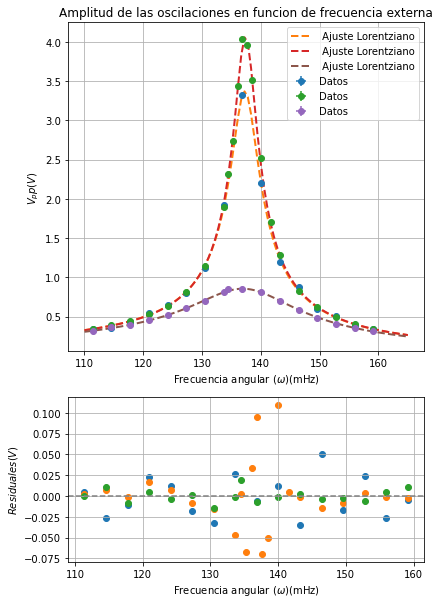

In [25]:
ys=[Data_R1['Voltaje(V)(±0.001)'],Data_R2['Voltaje(V)(±0.001)'],Data_R3['Voltaje(V)(±0.001)']]
xs=[Data_R1["Frecuencia(mHz)(±0.1)"],Data_R2["Frecuencia(mHz)(±0.1)"],Data_R3["Frecuencia(mHz)(±0.1)"]]

yerrs=[[0.001]*len(ys[0]),[0.001]*len(ys[1]),[0.001]*len(ys[2])]
xerrs=[[0.1]*len(xs[0]),[0.1]*len(xs[1]),[0.1]*len(xs[2])]

fig2, (ax5,ax6) = plt.subplots(2,1,figsize=(6,8.5),gridspec_kw={'height_ratios': [2, 1]})
y_preds=[]
x_=np.linspace(110,165,100)
poptls=[]
pcovls=[]

def lorentz(X,A,gamma,w):
    
    
    return A/(np.sqrt((w**2-X**2)**2+ (gamma*X)**2))

for i in range(3) :
    poptl, pcovl = curve_fit(lorentz,xs[i]/(2*np.pi),ys[i])
    poptls.append(poptl)
    pcovls.append(pcovl)
    y_preds.append(lorentz(x_, *poptl))
    y_fit=lorentz(xs[i]/(2*np.pi), *poptl)

    ax5.errorbar(xs[i]/(2*np.pi), ys[i], yerr[i], xerr[i],  fmt='o', label="Datos")
    ax5.plot(x_, y_preds[i], linewidth=2,ls="--",label=" Ajuste Lorentziano")
    
    ax6.scatter(xs[i]/(2*np.pi),ys[i]-y_fit)

ax5.set_xlabel('Frecuencia angular ($\omega$)(mHz)')
ax5.set_ylabel('$V_pp(V)$')
ax5.legend(loc='upper right')
ax5.set_title('Amplitud de las oscilaciones en funcion de frecuencia externa')

ax6.set_xlabel('Frecuencia angular ($\omega$)(mHz)')
ax6.set_ylabel('$Residuales(V)$')
ax5.grid()
ax6.grid()
ax6.axhline(y=0,color="gray",ls="--")

# Save the figure as a PDF file
plt.tight_layout()
plt.savefig('Resonancia.jpeg', format='jpeg')
plt.savefig('Resonancia.pdf', format='pdf')
plt.show()

In [26]:
poptls


[array([2220.99795641,    4.79857769,  137.31405722]),
 array([2218.64271888,   -3.9654463 ,  137.41071858]),
 array([2180.0153817 ,   18.57372235,  137.53297537])]

In [27]:
pcovls

[array([[ 4.37690968e+02,  1.18369205e+00, -7.37825286e-02],
        [ 1.18369205e+00,  4.67398928e-03, -5.68189142e-04],
        [-7.37825286e-02, -5.68189142e-04,  1.59099395e-03]]),
 array([[ 6.29425835e+02, -1.39972331e+00,  1.18552687e-01],
        [-1.39972331e+00,  3.80185604e-03, -1.75856144e-04],
        [ 1.18552687e-01, -1.75856144e-04,  6.84374432e-04]]),
 array([[3.99293700e+02, 4.27411273e+00, 3.33401824e-01],
        [4.27411273e+00, 5.48244547e-02, 1.99652466e-03],
        [3.33401824e-01, 1.99652466e-03, 8.18538758e-03]])]

In [28]:
gammas=unumpy.uarray([4.79857769,-3.9654463,18.57372235],np.sqrt([ 4.67398928e-03, 3.80185604e-03, 5.48244547e-02]))

In [29]:
omegas=unumpy.uarray([137.31405722,137.41071858,137.53297537],np.sqrt([1.59099395e-03, 6.84374432e-04, 8.18538758e-03]))

In [30]:
omegas

array([137.31405722+/-0.039887265511689314,
       137.41071858+/-0.02616055106453226,
       137.53297537+/-0.09047313181271001], dtype=object)

In [31]:
gammas

array([4.79857769+/-0.06836658013971446, -3.9654463+/-0.06165919266419242,
       18.57372235+/-0.23414622503897004], dtype=object)

In [32]:
Q=omegas/gammas
Q

array([28.615574466191458+/-0.4077782360522911,
       -34.6520185079798+/-0.538848712500333,
       7.404707186763778+/-0.09347308812116042], dtype=object)

In [33]:
np.mean(omegas)

137.41925039+/-0.034092612366904355